## MNIST Fashion Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load dataset

In [6]:
df=pd.read_csv("Data/fashion-mnist_train.csv")


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', \
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### Explore dataset

In [8]:
df.shape

(60000, 785)

In [10]:
df.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [11]:
X=df.iloc[:,1:].values

In [12]:
y=df.iloc[:,0].values

In [13]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

### Visualize dataset

In [14]:
selInd = 22
selImg = X[selInd].reshape(28,28)
selLabel = y[selInd]

Label Coat


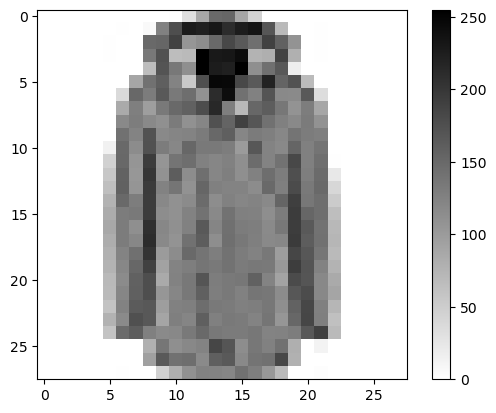

In [15]:
plt.imshow(selImg, cmap=plt.cm.binary)
plt.colorbar()
print('Label ' + class_names[selLabel])

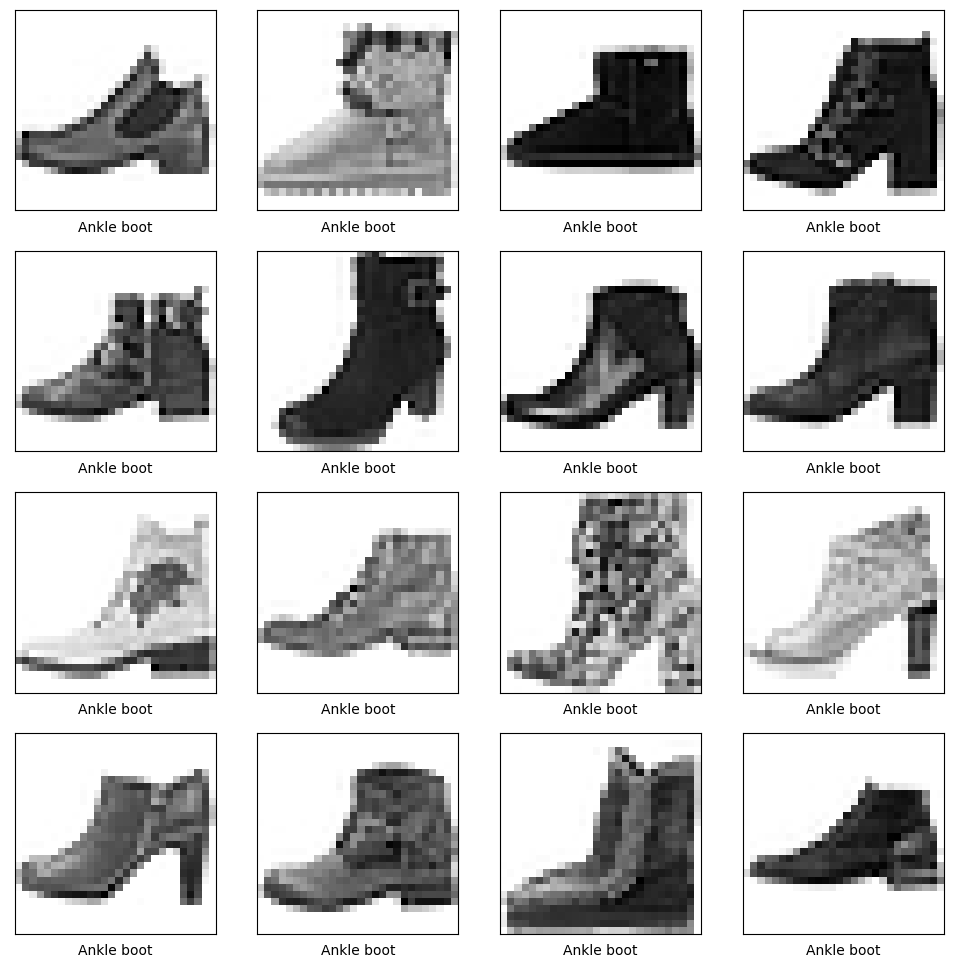

In [16]:
plt.figure(figsize=(12,12))

listSel = np.where(y==9)[0]

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    #plt.grid(False)
    plt.imshow(X[listSel[i]].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y[listSel[i]]])
plt.tight_layout    
plt.show()

### Classification using the raw images

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier(n_neighbors=5)

In [19]:
# We need to do feature scaling first.
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
sc = StandardScaler()
#sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#### Train the model

In [20]:
X_train.shape

(48000, 784)

In [21]:
clf.fit(X_train,y_train)

KNeighborsClassifier()

#### Apply the model

In [22]:
y_pred=clf.predict(X_test)

#### Evaluate model

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.861

In [24]:
import seaborn as sns

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

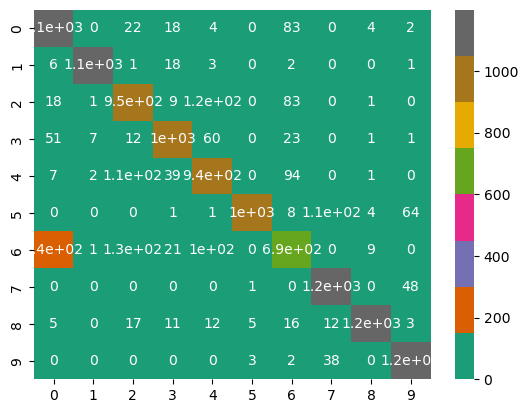

In [26]:
sns.heatmap(confusion_matrix(y_test,y_pred),cmap = 'Dark2', annot=True)
plt.show()

### Classification using low-dimensional features

### PCA

In [19]:
from sklearn.decomposition import PCA
pca=PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [20]:
print(X_train.shape)
print(X_train_pca.shape)

(48000, 784)
(48000, 50)


In [21]:
pca.explained_variance_ratio_

array([0.22024098, 0.14419115, 0.05491142, 0.05098134, 0.04076868,
       0.03016945, 0.02753644, 0.02319937, 0.01692356, 0.01309383,
       0.0116112 , 0.00959728, 0.00894364, 0.00850316, 0.00749369,
       0.0072865 , 0.00656127, 0.00636243, 0.00624921, 0.00582592,
       0.0051724 , 0.00513193, 0.0047191 , 0.00456297, 0.0043829 ,
       0.00416456, 0.00398117, 0.00396188, 0.00381577, 0.00372555,
       0.00366177, 0.00352046, 0.00335781, 0.00330179, 0.00327751,
       0.00320372, 0.00306223, 0.00296127, 0.00290876, 0.00282617,
       0.0027298 , 0.00266909, 0.00256516, 0.00253924, 0.00246046,
       0.00240343, 0.0023795 , 0.00224035, 0.00223717, 0.00212987])

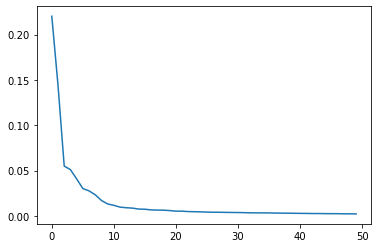

In [22]:
plt.plot(pca.explained_variance_ratio_)

In [23]:
clf.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [24]:
y_pred_pca=clf.predict(X_test_pca)

In [25]:
accuracy_score(y_test, y_pred_pca)

0.8548333333333333

### Classification performance with less features

In [26]:
accuracy=[]

for i in range (1,10):
    pca = PCA(n_components= i)
    X_tr = pca.fit_transform(X_train)
    X_te = pca.transform(X_test)
    
    clf.fit(X_tr, y_train)
    
    y_pred=clf.predict(X_te)
    
    accTmp = accuracy_score(y_test,y_pred)
    
    print('Num feat. : ' + str(i) + ' , accuracy: ' + str(accTmp))
    
    accuracy.append(accTmp)

Num feat. : 1 , accuracy: 0.2465
Num feat. : 2 , accuracy: 0.50625
Num feat. : 3 , accuracy: 0.6188333333333333
Num feat. : 4 , accuracy: 0.70825
Num feat. : 5 , accuracy: 0.7388333333333333
Num feat. : 6 , accuracy: 0.7635833333333333
Num feat. : 7 , accuracy: 0.7771666666666667
Num feat. : 8 , accuracy: 0.7868333333333334
Num feat. : 9 , accuracy: 0.7929166666666667


In [35]:
X2 = X[y==3]
y2 = y[y==3]

X_train,X_test,y_train,y_test=train_test_split(X2,y2,test_size=0.2)
pca=PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

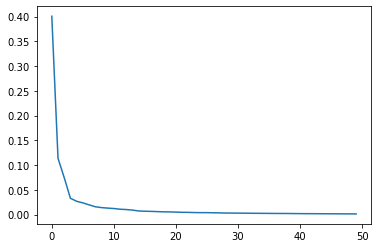

In [34]:
pca.explained_variance_ratio_
plt.plot(pca.explained_variance_ratio_)